In [ ]:
!pip install kagglehub

### Importation

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("dylanjcastillo/7k-books-with-metadata")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/7k-books-with-metadata


In [ ]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
import pandas as pd
import os

# Download the latest version of the dataset
dataset_path = kagglehub.dataset_download("dylanjcastillo/7k-books-with-metadata")

# Construct the full path to the books.csv file
file_path = os.path.join(dataset_path, "books.csv")

# Load the csv file into a pandas DataFrame
df = pd.read_csv(file_path)

print("First 5 records:", df.head())

First 5 records:           isbn13      isbn10           title subtitle  \
0  9780002005883  0002005883          Gilead      NaN   
1  9780002261982  0002261987    Spider's Web  A Novel   
2  9780006163831  0006163831    The One Tree      NaN   
3  9780006178736  0006178731  Rage of angels      NaN   
4  9780006280897  0006280897  The Four Loves      NaN   

                           authors                     categories  \
0               Marilynne Robinson                        Fiction   
1  Charles Osborne;Agatha Christie  Detective and mystery stories   
2             Stephen R. Donaldson               American fiction   
3                   Sidney Sheldon                        Fiction   
4              Clive Staples Lewis                 Christian life   

                                           thumbnail  \
0  http://books.google.com/books/content?id=KQZCP...   
1  http://books.google.com/books/content?id=gA5GP...   
2  http://books.google.com/books/content?id=OmQaw...   
3

In [ ]:
import os

# List files in the dataset directory
dataset_dir = "/kaggle/input/7k-books-with-metadata"
if os.path.exists(dataset_dir):
    print("Files in the dataset directory:")
    for filename in os.listdir(dataset_dir):
        print(filename)
else:
    print(f"Dataset directory not found at: {dataset_dir}")

Files in the dataset directory:
books.csv


In [ ]:
books_df = pd.read_csv(os.path.join(dataset_dir, "books.csv"))
books_df.head()

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0
2,9780006163831,0006163831,The One Tree,NaN,Stephen R. Donaldson,American fiction,http://books.google.com/books/content?id=OmQaw...,Volume Two of Stephen Donaldson's acclaimed se...,1982.0,3.97,479.0,172.0
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0


In [ ]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=books_df)

https://docs.google.com/spreadsheets/d/1YLM9j0qEKlngdaKpvtaSIPk-msJYP63konSz-twfswE/edit#gid=0


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


Text(50.58159722222221, 0.5, 'Missing values')

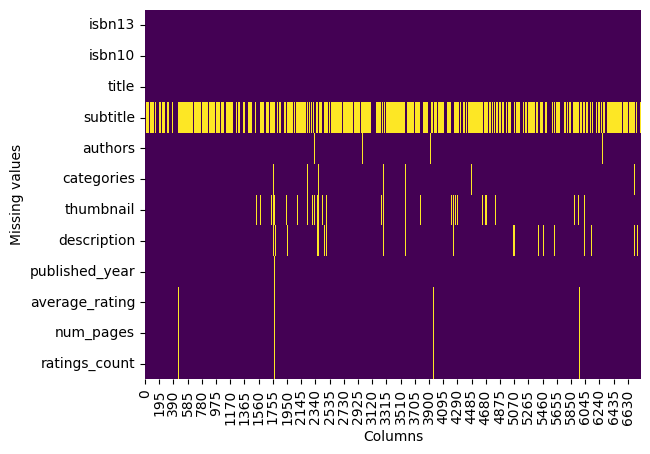

In [ ]:
ax = plt.axes()
sns.heatmap(books_df.isna().transpose(), cbar=False, cmap="viridis", ax=ax)

plt.xlabel("Columns")
plt.ylabel("Missing values")

plt.show()

In [ ]:
import numpy as np

books_df["missing_description"] = np.where(books_df["description"].isna(), 1, 0)
books_df["age_of_book"] = 2024 - books_df["published_year"]

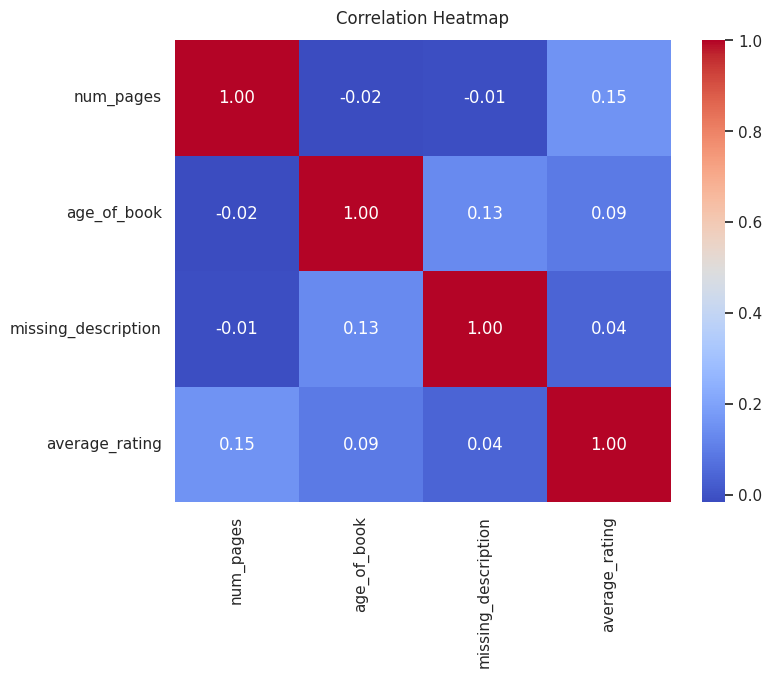

In [ ]:
columns_of_interest = ["num_pages", "age_of_book","missing_description","average_rating"]

corr_mat = books_df[columns_of_interest].corr(method="spearman")

sns.set_theme(style='white')
plt.figure(figsize=(8,6))
heatmap = sns.heatmap(corr_mat, annot=True, cmap="coolwarm", fmt=".2f")
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

plt.show()

In [ ]:
books_missing = books_df[~(books_df["description"].isna()) &
         ~(books_df["num_pages"].isna()) &
         ~(books_df["average_rating"].isna()) &
         ~(books_df["published_year"].isna())
         ]

In [ ]:
books_missing

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_description,age_of_book
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,0,20.0
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0,0,24.0
2,9780006163831,0006163831,The One Tree,NaN,Stephen R. Donaldson,American fiction,http://books.google.com/books/content?id=OmQaw...,Volume Two of Stephen Donaldson's acclaimed se...,1982.0,3.97,479.0,172.0,0,42.0
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0,0,31.0
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0,0,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6803,9788173031014,8173031010,Journey to the East,NaN,Hermann Hesse,Adventure stories,http://books.google.com/books/content?id=rq6JP...,This book tells the tale of a man who goes on ...,2002.0,3.70,175.0,24.0,0,22.0
6804,9788179921623,817992162X,The Monk Who Sold His Ferrari: A Fable About F...,NaN,Robin Sharma,Health & Fitness,http://books.google.com/books/content?id=c_7mf...,"Wisdom to Create a Life of Passion, Purpose, a...",2003.0,3.82,198.0,1568.0,0,21.0
6805,9788185300535,8185300534,I Am that,Talks with Sri Nisargadatta Maharaj,Sri Nisargadatta Maharaj;Sudhakar S. Dikshit,Philosophy,http://books.google.com/books/content?id=Fv_JP...,This collection of the timeless teachings of o...,1999.0,4.51,531.0,104.0,0,25.0
6808,9789027712059,9027712050,The Berlin Phenomenology,NaN,Georg Wilhelm Friedrich Hegel,History,http://books.google.com/books/content?id=Vy7Sk...,Since the three volume edition ofHegel's Philo...,1981.0,0.00,210.0,0.0,0,43.0


In [ ]:
books_missing["categories"].value_counts().reset_index().sort_values("count",ascending=False)

,categories,count
0,Fiction,2523
1,Juvenile Fiction,534
2,Biography & Autobiography,391
3,History,258
4,Literary Criticism,164
...,...,...
519,"Adventure stories, English",1
518,Germany,1
517,Egypt,1
516,Apartments,1


In [ ]:
books_missing["words_in_description"] = books_missing["description"].str.split().str.len()

/tmp/ipython-input-10-4057519413.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_missing["words_in_description"] = books_missing["description"].str.split().str.len()


In [ ]:
books_missing["words_in_description"]

,words_in_description
0,199
1,205
2,14
3,57
4,45
...,...
6803,63
6804,117
6805,174
6808,245


In [ ]:
books_missing.loc[books_missing["words_in_description"].between(1,4), "description"]

,description
6,Donation.
11,Fantasy-roman.
748,Includes bibliographical references.
770,Bound For Oregon (PB)
775,No Marketing Blurb
812,No Marketing Blurb
857,First published in 1813.
944,Edited by Maurice Hindle.
953,DEFOE/ROBINSON CRUSOE (BC)
954,Edited by John Carey.


In [ ]:
books_missing.loc[books_missing["words_in_description"].between(5,14), "description"]

,description
2,Volume Two of Stephen Donaldson's acclaimed se...
38,Koko is Peter Straub's foray into the psycholo...
70,A matter of life and death - and the Throne of...
77,Nonsense rhyming story. 4 yrs+
84,A study guide for the novel There's a Boy in t...
...,...
6715,The first comprehensive guide to addressing Na...
6726,Presents two complete novels from Henry James.
6757,Audio Book- unabriged on CD
6776,Raymond Chandler meets The Exorcist. Classic n...


In [ ]:
books_missing.loc[books_missing["words_in_description"].between(25,34), "description"]

,description
9,Kate Blackwell is an enigma and one of the mos...
14,"Available in the U.S. for the first time, this..."
20,"It is 1937, and Charles Ashworth, a Canon to t..."
21,Reissue of the author's most famous and well-l...
46,No one believes a little girl when she insists...
...,...
6760,"Joel, an English teacher, has never really lik..."
6766,Discusses the historical and intellectual back...
6775,Presents nearly one thousand recipes--from app...
6779,Edited by the creator and executive producer o...


In [ ]:
books_missing_25_words = books_missing[books_missing["words_in_description"] >= 25]

In [ ]:
books_missing_25_words

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_description,age_of_book,words_in_description
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,0,20.0,199
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0,0,24.0,205
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0,0,31.0,57
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0,0,22.0,45
5,9780006280934,0006280935,The Problem of Pain,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=Kk-uV...,"""In The Problem of Pain, C.S. Lewis, one of th...",2002.0,4.09,176.0,37569.0,0,22.0,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6802,9788172235222,8172235224,Mistaken Identity,NaN,Nayantara Sahgal,Indic fiction (English),http://books.google.com/books/content?id=q-tKP...,On A Train Journey Home To North India After L...,2003.0,2.93,324.0,0.0,0,21.0,288
6803,9788173031014,8173031010,Journey to the East,NaN,Hermann Hesse,Adventure stories,http://books.google.com/books/content?id=rq6JP...,This book tells the tale of a man who goes on ...,2002.0,3.70,175.0,24.0,0,22.0,63
6804,9788179921623,817992162X,The Monk Who Sold His Ferrari: A Fable About F...,NaN,Robin Sharma,Health & Fitness,http://books.google.com/books/content?id=c_7mf...,"Wisdom to Create a Life of Passion, Purpose, a...",2003.0,3.82,198.0,1568.0,0,21.0,117
6805,9788185300535,8185300534,I Am that,Talks with Sri Nisargadatta Maharaj,Sri Nisargadatta Maharaj;Sudhakar S. Dikshit,Philosophy,http://books.google.com/books/content?id=Fv_JP...,This collection of the timeless teachings of o...,1999.0,4.51,531.0,104.0,0,25.0,174


In [ ]:
books_missing_25_words["title_and_subtitle"] = (
    np.where(books_missing_25_words["subtitle"].isna(), books_missing_25_words["title"],
             books_missing_25_words[["title", "subtitle"]].astype(str).agg(":".join, axis=1))
)


/tmp/ipython-input-13-353504952.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_missing_25_words["title_and_subtitle"] = (


In [ ]:
books_missing_25_words

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_description,age_of_book,words_in_description,title_and_subtitle
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,0,20.0,199,Gilead
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0,0,24.0,205,Spider's Web:A Novel
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0,0,31.0,57,Rage of angels
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0,0,22.0,45,The Four Loves
5,9780006280934,0006280935,The Problem of Pain,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=Kk-uV...,"""In The Problem of Pain, C.S. Lewis, one of th...",2002.0,4.09,176.0,37569.0,0,22.0,75,The Problem of Pain
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6802,9788172235222,8172235224,Mistaken Identity,NaN,Nayantara Sahgal,Indic fiction (English),http://books.google.com/books/content?id=q-tKP...,On A Train Journey Home To North India After L...,2003.0,2.93,324.0,0.0,0,21.0,288,Mistaken Identity
6803,9788173031014,8173031010,Journey to the East,NaN,Hermann Hesse,Adventure stories,http://books.google.com/books/content?id=rq6JP...,This book tells the tale of a man who goes on ...,2002.0,3.70,175.0,24.0,0,22.0,63,Journey to the East
6804,9788179921623,817992162X,The Monk Who Sold His Ferrari: A Fable About F...,NaN,Robin Sharma,Health & Fitness,http://books.google.com/books/content?id=c_7mf...,"Wisdom to Create a Life of Passion, Purpose, a...",2003.0,3.82,198.0,1568.0,0,21.0,117,The Monk Who Sold His Ferrari: A Fable About F...
6805,9788185300535,8185300534,I Am that,Talks with Sri Nisargadatta Maharaj,Sri Nisargadatta Maharaj;Sudhakar S. Dikshit,Philosophy,http://books.google.com/books/content?id=Fv_JP...,This collection of the timeless teachings of o...,1999.0,4.51,531.0,104.0,0,25.0,174,I Am that:Talks with Sri Nisargadatta Maharaj


In [ ]:
books_missing_25_words["tagged_description"] = books_missing_25_words[["isbn13","description"]].astype(str).agg(" ".join, axis=1)

/tmp/ipython-input-14-3941305060.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_missing_25_words["tagged_description"] = books_missing_25_words[["isbn13","description"]].astype(str).agg(" ".join, axis=1)


In [ ]:
(
    books_missing_25_words
    .drop(["subtitle", "missing_description", "age_of_book","words_in_description"], axis=1)
    .to_csv("books_cleaned.csv", index=False)
)

### Vector Search

In [ ]:

from langchain_community.document_loaders import TextLoader
from langchain_text_splitters import CharacterTextSplitter
from langchain_chroma import Chroma

In [ ]:
%pip install -U langchain-community

In [ ]:
%pip install -U langchain-chroma

In [ ]:
%pip install -U langchain-google-genai

In [ ]:
from google.colab import userdata
HF_TOKEN = userdata.get('HF_TOKEN')

In [ ]:
books = pd.read_csv("books_cleaned.csv")

In [ ]:
books["tagged_description"]

,tagged_description
0,9780002005883 A NOVEL THAT READERS and critics...
1,9780002261982 A new 'Christie for Christmas' -...
2,"9780006178736 A memorable, mesmerizing heroine..."
3,9780006280897 Lewis' work on the nature of lov...
4,"9780006280934 ""In The Problem of Pain, C.S. Le..."
...,...
5192,9788172235222 On A Train Journey Home To North...
5193,9788173031014 This book tells the tale of a ma...
5194,9788179921623 Wisdom to Create a Life of Passi...
5195,9788185300535 This collection of the timeless ...


In [ ]:
books["tagged_description"].to_csv("tagged_description.txt",
                                   sep = "\n",
                                   header = False,
                                   index=False)

In [ ]:
raw_documents = TextLoader("tagged_description.txt").load()
text_splitter = CharacterTextSplitter(chunk_size=0, chunk_overlap=0, separator="\n")

documents = text_splitter.split_documents(raw_documents)

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.


In [ ]:
documents[0]

Document(metadata={'source': 'tagged_description.txt'}, page_content='9780002005883 A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. John Ames is a preacher, the son of a preacher and the grandson (both maternal and paternal) of preachers. It’s 1956 in Gilead, Iowa, towards the end of the Reverend Ames’s life, and he is absorbed in recording his family’s story, a legacy for the young son he will never see grow up. Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist. He is troubled, too, by his prodigal namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for forgiveness and redemption. Told in John Ames’s joyous, rambling voice that finds beauty, humour and truth in the smallest of life’s details, Gi

In [ ]:
%pip install langchain-huggingface

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.3/442.3 kB 13.9 MB/s eta 0:00:00
  Attempting uninstall: langchain-core
    Found existing installation: langchain-core 0.3.69
    Uninstalling langchain-core-0.3.69:
      Successfully uninstalled langchain-core-0.3.69


In [ ]:
from langchain_huggingface import HuggingFaceEmbeddings

In [ ]:
db_books = Chroma.from_documents(
    documents,
  embedding = HuggingFaceEmbeddings(model_name="sentence-transformers/all-mpnet-base-v2")
)

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
from langchain_chroma import Chroma
from langchain_huggingface import HuggingFaceEmbeddings

persist_directory = "chroma_db_books"
embedding_model = HuggingFaceEmbeddings(model_name="sentence-transformers/all-mpnet-base-v2")

db_books = Chroma(persist_directory=persist_directory, embedding_function=embedding_model)

print(f"Chroma database loaded from: {persist_directory}")

In [ ]:
query = "A book to teach children about nature"
docs = db_books.similarity_search(query, k=5)
docs[3]

Document(id='cb167578-6edb-457c-a533-f37530c05a9e', metadata={'source': 'tagged_description.txt'}, page_content='9780786808069 Children will discover the exciting world of their own backyard in this introduction to familiar animals from cats and dogs to bugs and frogs. The combination of photographs, illustrations, and fun facts make this an accessible and delightful learning experience.')

In [ ]:
books[books["isbn13"] == int(docs[3].page_content.split()[0].strip())]

,isbn13,isbn10,title,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,title_and_subtitle,tagged_description
3747,9780786808069,0786808063,Baby Einstein: Neighborhood Animals,Marilyn Singer;Julie Aigner-Clark,Juvenile Fiction,http://books.google.com/books/content?id=X9a4P...,Children will discover the exciting world of t...,2001.0,3.89,16.0,180.0,Baby Einstein: Neighborhood Animals,9780786808069 Children will discover the excit...


In [ ]:
def retrieve_semantic_recommendations(
    query: str,
    top_k :int = 10,
) -> pd.DataFrame:
  recs = db_books.similarity_search(query, k=top_k)

  books_list = []

  for i in range(0, len(recs)):
    books_list += [int(recs[i].page_content.strip('"').split()[0])]

  return books[books["isbn13"].isin(books_list)].head(top_k)

In [ ]:
retrieve_semantic_recommendations("A book to teach children about nature")

,isbn13,isbn10,title,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,title_and_subtitle,tagged_description
324,9780060959036,0060959037,Prodigal Summer,Barbara Kingsolver,Fiction,http://books.google.com/books/content?id=06IwG...,Barbara Kingsolver's fifth novel is a hymn to ...,2001.0,4.00,444.0,85440.0,Prodigal Summer:A Novel,9780060959036 Barbara Kingsolver's fifth novel...
427,9780064434874,0064434877,Christmas in the Big Woods,Laura Ingalls Wilder,Juvenile Fiction,http://books.google.com/books/content?id=FT1Yp...,"Long ago, a little girl named Laura Ingalls li...",1997.0,4.19,32.0,2062.0,Christmas in the Big Woods,"9780064434874 Long ago, a little girl named La..."
442,9780067575208,006757520X,The Sense of Wonder,Rachel Carson,Nature,http://books.google.com/books/content?id=Zee5S...,"First published more than three decades ago, t...",1998.0,4.39,112.0,1160.0,The Sense of Wonder,9780067575208 First published more than three ...
1247,9780312369347,0312369344,Beatrix Potter,Linda Lear,Biography & Autobiography,http://books.google.com/books/content?id=T9uTx...,"Peter Rabbit, Mr. McGregor, and many other Bea...",2007.0,4.03,584.0,1270.0,Beatrix Potter:A Life in Nature,"9780312369347 Peter Rabbit, Mr. McGregor, and ..."
3214,9780689861130,0689861133,"Moo, Baa, la la La!",Sandra Boynton,Animal sounds,http://books.google.com/books/content?id=Gz40A...,Children will love joining in and imitating th...,2004.0,4.20,14.0,28261.0,"Moo, Baa, la la La!",9780689861130 Children will love joining in an...
3581,9780763620875,0763620874,Judy Moody Saves the World!,Megan McDonald,Juvenile Fiction,http://books.google.com/books/content?id=xDIRB...,When Judy Moody gets serious about protecting ...,2004.0,4.03,160.0,5883.0,Judy Moody Saves the World!,9780763620875 When Judy Moody gets serious abo...
3747,9780786808069,0786808063,Baby Einstein: Neighborhood Animals,Marilyn Singer;Julie Aigner-Clark,Juvenile Fiction,http://books.google.com/books/content?id=X9a4P...,Children will discover the exciting world of t...,2001.0,3.89,16.0,180.0,Baby Einstein: Neighborhood Animals,9780786808069 Children will discover the excit...
3748,9780786808373,0786808373,Baby Einstein: Birds,Julie Aigner-Clark,Juvenile Fiction,http://books.google.com/books/content?id=0jxHP...,"Introducing your baby to birds, cats, dogs, an...",2002.0,3.78,20.0,9.0,Baby Einstein: Birds,"9780786808373 Introducing your baby to birds, ..."
3749,9780786808380,0786808381,Baby Einstein: Babies,Julie Aigner-Clark,Juvenile Fiction,http://books.google.com/books/content?id=jv4NA...,"Introduce your babies to birds, cats, dogs, an...",2002.0,4.03,20.0,29.0,Baby Einstein: Babies,"9780786808380 Introduce your babies to birds, ..."
3750,9780786808397,078680839X,Baby Einstein: Dogs,Julie Aigner-Clark,Juvenile Fiction,http://books.google.com/books/content?id=qut8t...,"Introduce your baby to birds, cats, dogs, and ...",2002.0,3.81,20.0,26.0,Baby Einstein: Dogs,"9780786808397 Introduce your baby to birds, ca..."


### Text Classiffication

In [ ]:
books["categories"].value_counts().reset_index().query("count > 50")

,categories,count
0,Fiction,2111
1,Juvenile Fiction,390
2,Biography & Autobiography,311
3,History,207
4,Literary Criticism,124
5,Religion,117
6,Philosophy,117
7,Comics & Graphic Novels,116
8,Drama,86
9,Juvenile Nonfiction,57


In [ ]:
category_mapping = {
    'Fiction':'Fiction',
    'Juvenile Fiction': "Children's Fiction",
    'Biography & Autobiography' : "Nonfiction",
    'History' : "Nonfiction",
    'Literary Criticism' : "Nonfiction",
    'Religion': "Nonfiction",
   ' Philosophy': "Nonfiction",
    'Comics & Graphic Novels':'Fiction',
    'Drama':'Fiction',
    'Juvenile Nonfiction': "Children's Nonfiction",
    'Science': "Nonfiction",
   ' Poetry':'Fiction',
}

books["simple_categorie"] = books["categories"].map(category_mapping)

In [ ]:
books[~(books["simple_categorie"].isna())]

,isbn13,isbn10,title,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,title_and_subtitle,tagged_description,simple_categorie
0,9780002005883,0002005883,Gilead,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,Gilead,9780002005883 A NOVEL THAT READERS and critics...,Fiction
2,9780006178736,0006178731,Rage of angels,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0,Rage of angels,"9780006178736 A memorable, mesmerizing heroine...",Fiction
8,9780006482079,0006482074,Warhost of Vastmark,Janny Wurts,Fiction,http://books.google.com/books/content?id=uOL0f...,"Tricked once more by his wily half-brother, Ly...",1995.0,4.03,522.0,2966.0,Warhost of Vastmark,9780006482079 Tricked once more by his wily ha...,Fiction
30,9780006646006,000664600X,Ocean Star Express,Mark Haddon;Peter Sutton,Juvenile Fiction,http://books.google.com/books/content?id=I2QZA...,Joe and his parents are enjoying a summer holi...,2002.0,3.50,32.0,1.0,Ocean Star Express,9780006646006 Joe and his parents are enjoying...,Children's Fiction
46,9780007121014,0007121016,Taken at the Flood,Agatha Christie,Fiction,http://books.google.com/books/content?id=3gWlx...,A Few Weeks After Marrying An Attractive Young...,2002.0,3.71,352.0,8852.0,Taken at the Flood,9780007121014 A Few Weeks After Marrying An At...,Fiction
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5174,9781933372198,1933372192,Amazing Disgrace,James Hamilton-Paterson,Fiction,http://books.google.com/books/content?id=s7jyA...,In this sequel to the popular Cooking with Fer...,2006.0,3.79,320.0,219.0,Amazing Disgrace,9781933372198 In this sequel to the popular Co...,Fiction
5178,9781933648279,1933648279,Night Has a Thousand Eyes,Cornell Woolrich,Fiction,http://books.google.com/books/content?id=3Gk6s...,"""Cornell Woolrich's novels define the essence ...",2007.0,3.77,344.0,680.0,Night Has a Thousand Eyes,"9781933648279 ""Cornell Woolrich's novels defin...",Fiction
5188,9784770028969,4770028962,Coin Locker Babies,村上龍,Fiction,http://books.google.com/books/content?id=87DJw...,Rescued from the lockers in which they were le...,2002.0,3.75,393.0,5560.0,Coin Locker Babies,9784770028969 Rescued from the lockers in whic...,Fiction
5189,9788122200850,8122200850,"Cry, the Peacock",Anita Desai,Fiction,http://books.google.com/books/content?id=_QKwV...,This book is the story of a young girl obsesse...,1980.0,3.22,218.0,134.0,"Cry, the Peacock",9788122200850 This book is the story of a youn...,Fiction


In [ ]:
from transformers import pipeline
import torch

fiction_categories = ["Fiction", "Nonfiction"]

# Determine the device to use
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

pipe = pipeline("zero-shot-classification",
                model="facebook/bart-large-mnli",
                device=device)

Using device: cuda


config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

Device set to use cuda


In [ ]:
sequence = books.loc[books["simple_categorie"] == "Fiction", "description"].reset_index(drop=True)[0]

In [ ]:
pipe(sequence, fiction_categories)

{'sequence': 'A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. John Ames is a preacher, the son of a preacher and the grandson (both maternal and paternal) of preachers. It’s 1956 in Gilead, Iowa, towards the end of the Reverend Ames’s life, and he is absorbed in recording his family’s story, a legacy for the young son he will never see grow up. Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist. He is troubled, too, by his prodigal namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for forgiveness and redemption. Told in John Ames’s joyous, rambling voice that finds beauty, humour and truth in the smallest of life’s details, Gilead is a song of celebration and acceptance of the best and the worst

In [ ]:
max_index = np.argmax(pipe(sequence, fiction_categories)["scores"])
max_label = pipe(sequence, fiction_categories)["labels"][max_index]
max_label

'Fiction'

In [ ]:
def generated_prediction(sequence, categories):
  predictions = pipe(sequence, categories)
  max_index = np.argmax(predictions["scores"])
  max_label = predictions["labels"][max_index]
  return max_label

In [ ]:
from tqdm import tqdm

actual_cat = []
predicted_cat = []

for i in tqdm(range(0, 300)):
  sequence = books.loc[books["simple_categorie"] == "Fiction", "description"].reset_index(drop=True)[i]
  predicted_cat += [generated_prediction(sequence, fiction_categories)]
  actual_cat += ["Fiction"]

100%|██████████| 300/300 [00:28<00:00, 10.39it/s]


In [ ]:
for i in tqdm(range(0, 300)):
  sequence = books.loc[books["simple_categorie"] == "Nonfiction", "description"].reset_index(drop=True)[i]
  predicted_cat += [generated_prediction(sequence, fiction_categories)]
  actual_cat += ["Nonfiction"]

100%|██████████| 300/300 [00:27<00:00, 10.82it/s]


In [ ]:
predictions_df = pd.DataFrame({"actual": actual_cat, "predicted": predicted_cat})

In [ ]:
predictions_df["correct_prediction"] = (
    np.where(predictions_df["actual"] == predictions_df["predicted"], 1, 0)
)

In [ ]:
predictions_df["correct_prediction"].sum() / len(predictions_df)

np.float64(0.7733333333333333)

In [ ]:
isbns = []
predicted_categories = []

missing_cats = books.loc[books["simple_categorie"].isna(), ["isbn13", "description"]].reset_index(drop=True)

In [ ]:
for i in tqdm(range(0, len(missing_cats))):
  sequence = missing_cats["description"][i]
  predicted_categories += [generated_prediction(sequence, fiction_categories)]
  isbns += [missing_cats["isbn13"][i]]

100%|██████████| 1622/1622 [02:19<00:00, 11.67it/s]


In [ ]:
missing_predicted_df = pd.DataFrame({"isbn13": isbns, "predicted_categories": predicted_categories})

In [ ]:
missing_predicted_df

,isbn13,predicted_categories
0,9780002261982,Fiction
1,9780006280897,Nonfiction
2,9780006280934,Nonfiction
3,9780006380832,Nonfiction
4,9780006470229,Fiction
...,...,...
1617,9788171565641,Fiction
1618,9788172235222,Fiction
1619,9788173031014,Nonfiction
1620,9788179921623,Fiction


In [ ]:
books = pd.merge(books, missing_predicted_df, on="isbn13", how="left")
books["simple_categorie"] = np.where(books["simple_categorie"].isna(), books["predicted_categories"], books["simple_categorie"])
books = books.drop(columns=["predicted_categories"])

In [ ]:
books["simple_categorie"].value_counts(normalize=True)

,count
simple_categorie,
Fiction,2775
Nonfiction,1975
Children's Fiction,390
Children's Nonfiction,57


In [ ]:
len(books[books["categories"].str.lower().isin([
    "romance",
    "science fiction",
    "scifi",
    "fantasy",
    "crime",
    "historical",
    "comedy",
    "horror",
    "mystery",
    "thriller"
])])

16

### Emotions Analyst

In [ ]:
from transformers import pipeline
classifier = pipeline("text-classification",
                      model = "j-hartmann/emotion-english-distilroberta-base",
                      top_k = None,
                      device = device
                      )

classifier('I love you !')

config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/329M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/294 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/329M [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

Device set to use cuda


[[{'label': 'joy', 'score': 0.9744997620582581},
  {'label': 'sadness', 'score': 0.009134232066571712},
  {'label': 'neutral', 'score': 0.00712541863322258},
  {'label': 'surprise', 'score': 0.004197141155600548},
  {'label': 'anger', 'score': 0.0032793886493891478},
  {'label': 'disgust', 'score': 0.0013203432317823172},
  {'label': 'fear', 'score': 0.0004438101896084845}]]

In [ ]:
books["description"][0]

'A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. John Ames is a preacher, the son of a preacher and the grandson (both maternal and paternal) of preachers. It’s 1956 in Gilead, Iowa, towards the end of the Reverend Ames’s life, and he is absorbed in recording his family’s story, a legacy for the young son he will never see grow up. Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist. He is troubled, too, by his prodigal namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for forgiveness and redemption. Told in John Ames’s joyous, rambling voice that finds beauty, humour and truth in the smallest of life’s details, Gilead is a song of celebration and acceptance of the best and the worst the world ha

In [ ]:
classifier(books["description"][0])

[[{'label': 'fear', 'score': 0.6548413634300232},
  {'label': 'neutral', 'score': 0.16985207796096802},
  {'label': 'sadness', 'score': 0.11640888452529907},
  {'label': 'surprise', 'score': 0.02070062793791294},
  {'label': 'disgust', 'score': 0.019100705161690712},
  {'label': 'joy', 'score': 0.015161297284066677},
  {'label': 'anger', 'score': 0.003935146611183882}]]

In [ ]:
predictions = classifier(books["description"][0].split("."))

In [ ]:
sorted(predictions[0], key=lambda x: x["label"])

[{'label': 'anger', 'score': 0.009156348183751106},
 {'label': 'disgust', 'score': 0.00262847519479692},
 {'label': 'fear', 'score': 0.06816219538450241},
 {'label': 'joy', 'score': 0.04794241115450859},
 {'label': 'neutral', 'score': 0.1403856873512268},
 {'label': 'sadness', 'score': 0.0021221605129539967},
 {'label': 'surprise', 'score': 0.7296026945114136}]

In [ ]:
emotion_labels = ["anger", "disgust", "fear", "joy", "neutral","sadness", "surprise"]
isbn = []

emotion_scores = {label: [] for label in emotion_labels}

def calculate_max_emotion_score(predictions):
  per_emotion_score = {label: [] for label in emotion_labels}
  for prediction in predictions:
    sorted_predictions = sorted(prediction, key=lambda x: x["label"])
    for index, label in enumerate(emotion_labels):
      per_emotion_score[label].append([sorted_predictions[index]["score"]])
  return {label: np.max(scores) for label, scores in per_emotion_score.items()}

In [ ]:
for i in tqdm(range(0, len(books))):
  isbn.append(books["isbn13"][i])
  sentences = books["description"][i].split(".")
  predictions = classifier(sentences)
  max_scores = calculate_max_emotion_score(predictions)
  for label in emotion_labels:
    emotion_scores[label].append(max_scores[label])

100%|██████████| 5197/5197 [02:12<00:00, 39.33it/s]


In [ ]:
emotions_df = pd.DataFrame(emotion_scores)
emotions_df["isbn13"] = isbn

In [ ]:
emotions_df

,anger,disgust,fear,joy,neutral,sadness,surprise,isbn13
0,0.064134,0.273591,0.928168,0.932797,0.646216,0.967158,0.729603,9780002005883
1,0.612619,0.348284,0.942528,0.704422,0.887939,0.111690,0.252545,9780002261982
2,0.064134,0.104007,0.972321,0.767237,0.549477,0.111690,0.078766,9780006178736
3,0.351484,0.150723,0.360706,0.251881,0.732685,0.111690,0.078766,9780006280897
4,0.081412,0.184495,0.095043,0.040564,0.884390,0.475881,0.078766,9780006280934
...,...,...,...,...,...,...,...,...
5192,0.148208,0.030643,0.919165,0.255170,0.853722,0.980877,0.030656,9788172235222
5193,0.064134,0.114383,0.051363,0.400263,0.883199,0.111690,0.227765,9788173031014
5194,0.009997,0.009929,0.339218,0.947779,0.375755,0.066685,0.057625,9788179921623
5195,0.064134,0.104007,0.459269,0.759455,0.951104,0.368111,0.078766,9788185300535


In [ ]:
books = pd.merge(books, emotions_df, on="isbn13")

In [ ]:
books

,isbn13,isbn10,title,authors,categories,thumbnail,description,published_year,average_rating,num_pages,...,title_and_subtitle,tagged_description,simple_categorie,anger,disgust,fear,joy,neutral,sadness,surprise
0,9780002005883,0002005883,Gilead,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,...,Gilead,9780002005883 A NOVEL THAT READERS and critics...,Fiction,0.064134,0.273591,0.928168,0.932797,0.646216,0.967158,0.729603
1,9780002261982,0002261987,Spider's Web,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,...,Spider's Web:A Novel,9780002261982 A new 'Christie for Christmas' -...,Fiction,0.612619,0.348284,0.942528,0.704422,0.887939,0.111690,0.252545
2,9780006178736,0006178731,Rage of angels,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,...,Rage of angels,"9780006178736 A memorable, mesmerizing heroine...",Fiction,0.064134,0.104007,0.972321,0.767237,0.549477,0.111690,0.078766
3,9780006280897,0006280897,The Four Loves,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,...,The Four Loves,9780006280897 Lewis' work on the nature of lov...,Nonfiction,0.351484,0.150723,0.360706,0.251881,0.732685,0.111690,0.078766
4,9780006280934,0006280935,The Problem of Pain,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=Kk-uV...,"""In The Problem of Pain, C.S. Lewis, one of th...",2002.0,4.09,176.0,...,The Problem of Pain,"9780006280934 ""In The Problem of Pain, C.S. Le...",Nonfiction,0.081412,0.184495,0.095043,0.040564,0.884390,0.475881,0.078766
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5192,9788172235222,8172235224,Mistaken Identity,Nayantara Sahgal,Indic fiction (English),http://books.google.com/books/content?id=q-tKP...,On A Train Journey Home To North India After L...,2003.0,2.93,324.0,...,Mistaken Identity,9788172235222 On A Train Journey Home To North...,Fiction,0.148208,0.030643,0.919165,0.255170,0.853722,0.980877,0.030656
5193,9788173031014,8173031010,Journey to the East,Hermann Hesse,Adventure stories,http://books.google.com/books/content?id=rq6JP...,This book tells the tale of a man who goes on ...,2002.0,3.70,175.0,...,Journey to the East,9788173031014 This book tells the tale of a ma...,Nonfiction,0.064134,0.114383,0.051363,0.400263,0.883199,0.111690,0.227765
5194,9788179921623,817992162X,The Monk Who Sold His Ferrari: A Fable About F...,Robin Sharma,Health & Fitness,http://books.google.com/books/content?id=c_7mf...,"Wisdom to Create a Life of Passion, Purpose, a...",2003.0,3.82,198.0,...,The Monk Who Sold His Ferrari: A Fable About F...,9788179921623 Wisdom to Create a Life of Passi...,Fiction,0.009997,0.009929,0.339218,0.947779,0.375755,0.066685,0.057625
5195,9788185300535,8185300534,I Am that,Sri Nisargadatta Maharaj;Sudhakar S. Dikshit,Philosophy,http://books.google.com/books/content?id=Fv_JP...,This collection of the timeless teachings of o...,1999.0,4.51,531.0,...,I Am that:Talks with Sri Nisargadatta Maharaj,9788185300535 This collection of the timeless ...,Nonfiction,0.064134,0.104007,0.459269,0.759455,0.951104,0.368111,0.078766


In [ ]:
books.to_csv("books_with_emtions.csv", index=False)

In [ ]:
%%writefile gradio-dashboard.py
import pandas as pd
import numpy as np
from langchain_community.document_loaders import TextLoader
from langchain_text_splitters import CharacterTextSplitter
from langchain_chroma import Chroma
from langchain_huggingface import HuggingFaceEmbeddings
import torch
from transformers import pipeline
import gradio as gr


books = pd.read_csv("books_with_emtions.csv")
books["large_thumbnail"] = books["thumbnail"] + "&fife=w800"
books["large_thumbnail"] = np.where(
    books["thumbnail"].isna(),
    "/content/OIP.webp",
    books["large_thumbnail"],
)


persist_directory = "chroma_db_books"
embedding_model = HuggingFaceEmbeddings(model_name="sentence-transformers/all-mpnet-base-v2")

db_books = Chroma(persist_directory=persist_directory, embedding_function=embedding_model)

# raw_documents = TextLoader("tagged_description.txt").load()
# text_splitter = CharacterTextSplitter(chunk_size=0, chunk_overlap=0, separator="\n")

# documents = text_splitter.split_documents(raw_documents)
# db_books = Chroma.from_documents(
#     documents,
#   embedding = HuggingFaceEmbeddings(model_name="sentence-transformers/all-mpnet-base-v2")
# )

def retrieve_semantic_recommendations(
    query: str,
    category: str=None,
    tone: str=None,
    initial_top_k :int = 50,
    final_top_k :int = 16,
) -> pd.DataFrame:
  recs = db_books.similarity_search(query, k=initial_top_k)
  books_list = [int(rec.page_content.strip('"').split()[0]) for rec in recs]
  book_recs = books[books["isbn13"].isin(books_list)].head(final_top_k)
  if category != "All":
    book_recs = book_recs[book_recs["simple_categorie"] == category].head(final_top_k)
  else:
    book_recs = book_recs.head(final_top_k)

  if tone == "Happy":
    book_recs.sort_values(by="joy", ascending=False, inplace=True)
  elif tone == "Sad":
    book_recs.sort_values(by="sadness", ascending=False, inplace=True)
  elif tone == "Angry":
    book_recs.sort_values(by="anger", ascending=False, inplace=True)
  elif tone == "Suspenseful":
    book_recs.sort_values(by="fear", ascending=False, inplace=True)
  elif tone == "Surprising":
    book_recs.sort_values(by="surprise", ascending=False, inplace=True)
  # elif tone == "Neutral":
  #   book_recs.sort_values(by="neutral", ascending=False, inplace=True)
  return book_recs

def recommended_book(query, category, tone):
    recommendations =  retrieve_semantic_recommendations(query, category, tone)
    results = []
    for _, row in recommendations.iterrows():
      description = row["description"]
      truncated_desc_split = description.split()
      truncated_description = " ".join(truncated_desc_split[:30]) + "..."

      authors_split = row["authors"].split(";")
      if len(authors_split) == 2:
        authors_str = f"{authors_split[0]} and {authors_split[1]}"
      elif len(authors_split) > 2:
        authors_str = ", ".join(authors_split[:-1]) + f", and {authors_split[-1]}"
      else:
        authors_str = row["authors"]

      caption = f"{row['title']} by {authors_str}: {truncated_description}"
      results.append((caption, row["large_thumbnail"]))
    return results

# This code block was incorrectly unindented
categories = ["All"] + sorted(books["simple_categorie"].unique().tolist())
tones = ["All"] + ["Happy", "Sad", "Angry", "Suspenseful", "Surprising"]

with gr.Blocks(theme = gr.themes.Glass()) as dashboard:
  gr.Markdown("# Semantic Book Recommendation System")

  with gr.Row():
    user_query = gr.Textbox(label= "Please enter a description of a book", placeholder="e.g., A story about forgiveness")
    category_dropdown = gr.Dropdown(choices = categories, label="Select a category", value="All")
    tone_dropdown = gr.Dropdown(choices = tones, label="Select a Tone", value="All")
    submit_button = gr.Button("Find Recommendations")

  gr.Markdown("## Recommendations")
  output = gr.Gallery(label="Recommended Books", columns = 8, rows = 2)

  submit_button.click(
      fn = recommended_book,
      inputs = [user_query, category_dropdown, tone_dropdown],
      outputs = output
  )

if __name__ =="__main__":
  dashboard.launch(debug=True, share=True )

Overwriting gradio-dashboard.py


In [ ]:
!pip install pyngrok

In [ ]:
from pyngrok import ngrok

# Replace "YOUR_AUTHTOKEN" with your actual ngrok authtoken
ngrok.set_auth_token("2zyW3NcBgBEC5qLnoWc9cYSlnXe_QnZTTwKyyenzTfNiNhCK")

In [ ]:
from pyngrok import ngrok

# Expose le port 8501 (port par défaut de Streamlit)
public_url = ngrok.connect(8501)
print(f"🔗 Application accessible ici : {public_url}")

!python gradio-dashboard.py

🔗 Application accessible ici : NgrokTunnel: "https://0ce0714f75dd.ngrok-free.app" -> "http://localhost:8501"
2025-07-22 19:57:37.593075: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1753214257.624823   11569 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1753214257.634558   11569 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
* Running on local URL:  http://127.0.0.1:7860
* Running on public URL: https://36592fa480de2bad05.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
Keyboard

In [ ]:
!python gradio-dashboard.py

In [ ]:
# Define a directory path to save the database
persist_directory = "chroma_db_books"

# Save the database to the specified directory
db_books.persist(persist_directory)

print(f"Chroma database saved to: {persist_directory}")

AttributeError: 'Chroma' object has no attribute 'persist'

In [ ]:
# Define a directory path to save the database
persist_directory = "chroma_db_books"

db_books = Chroma.from_documents(
    documents,
    embedding=HuggingFaceEmbeddings(model_name="sentence-transformers/all-mpnet-base-v2"),
    persist_directory=persist_directory
)

print(f"Chroma database created and saved to: {persist_directory}")

Chroma database created and saved to: chroma_db_books


# Task
Convert the provided Gradio application code to a Streamlit application. The application should load the "books_with_emtions.csv" dataset and a Chroma vector database from the "chroma_db_books" directory, and provide book recommendations based on user input, similar to the original Gradio app.

## Import streamlit and necessary libraries

### Subtask:
Import the required libraries for the Streamlit application.


**Reasoning**:
The subtask is to import the necessary libraries for the Streamlit application. The provided code block contains all the required import statements.



In [ ]:
import streamlit as st
import pandas as pd
import numpy as np
from langchain_chroma import Chroma
from langchain_huggingface import HuggingFaceEmbeddings
import torch
from transformers import pipeline

## Load data and vector database

### Subtask:
Load the `books_with_emtions.csv` dataset into a pandas DataFrame and load the saved Chroma vector database from the `chroma_db_books` directory.


**Reasoning**:
Load the dataset, create the large_thumbnail column, handle missing values in the large_thumbnail column, define the persist directory, initialize the embedding model, and load the Chroma database.



In [ ]:
books = pd.read_csv("books_with_emtions.csv")
books["large_thumbnail"] = books["thumbnail"] + "&fife=w800"
books["large_thumbnail"] = np.where(
    books["thumbnail"].isna(),
    "/content/OIP.webp",
    books["large_thumbnail"],
)

persist_directory = "chroma_db_books"
embedding_model = HuggingFaceEmbeddings(model_name="sentence-transformers/all-mpnet-base-v2")
db_books = Chroma(persist_directory=persist_directory, embedding_function=embedding_model)

print("Books dataset loaded and Chroma database loaded.")

Books dataset loaded and Chroma database loaded.


## Define recommendation function

### Subtask:
Adapt the existing Python functions for generating book recommendations (`retrieve_semantic_recommendations` and `recommended_book`) to be compatible with the Streamlit framework. These functions should take user input from Streamlit widgets and return the recommendations in a format suitable for display in the Streamlit UI.


**Reasoning**:
Define the `retrieve_semantic_recommendations` and `recommended_book` functions to integrate with Streamlit, handling filtering, sorting, and formatting of recommendations.



In [ ]:
def retrieve_semantic_recommendations(
    query: str,
    category: str = None,
    tone: str = None,
    initial_top_k: int = 50,
    final_top_k: int = 16,
) -> pd.DataFrame:
  """
    Retrieves book recommendations based on semantic similarity, category, and tone.

    Args:
        query: The user's query for book recommendations.
        category: The desired book category (e.g., "Fiction", "Nonfiction", "All").
        tone: The desired emotional tone (e.g., "Happy", "Sad", "Angry", "Suspenseful", "Surprising", "All").
        initial_top_k: The initial number of similar books to retrieve from the vector database.
        final_top_k: The final number of recommendations to return after filtering and sorting.

    Returns:
        A pandas DataFrame containing the recommended books.
    """
  recs = db_books.similarity_search(query, k=initial_top_k)
  books_list = [int(rec.page_content.strip('"').split()[0]) for rec in recs]
  book_recs = books[books["isbn13"].isin(books_list)].copy() # Use .copy() to avoid SettingWithCopyWarning

  if category != "All":
    book_recs = book_recs[book_recs["simple_categorie"] == category].head(final_top_k)
  else:
    book_recs = book_recs.head(final_top_k)

  if tone == "Happy":
    book_recs.sort_values(by="joy", ascending=False, inplace=True)
  elif tone == "Sad":
    book_recs.sort_values(by="sadness", ascending=False, inplace=True)
  elif tone == "Angry":
    book_recs.sort_values(by="anger", ascending=False, inplace=True)
  elif tone == "Suspenseful":
    book_recs.sort_values(by="fear", ascending=False, inplace=True)
  elif tone == "Surprising":
    book_recs.sort_values(by="surprise", ascending=False, inplace=True)

  return book_recs.head(final_top_k)


def recommended_book(query, category, tone):
  """
    Generates formatted recommendations for display in the Streamlit UI.

    Args:
        query: The user's query.
        category: The selected category.
        tone: The selected tone.

    Returns:
        A list of tuples, where each tuple contains a formatted caption and the thumbnail URL.
    """
  recommendations = retrieve_semantic_recommendations(query, category, tone)
  results = []
  for _, row in recommendations.iterrows():
    description = row["description"]
    truncated_desc_split = description.split()
    truncated_description = " ".join(truncated_desc_split[:30]) + "..."

    authors_split = row["authors"].split(";")
    if len(authors_split) == 2:
      authors_str = f"{authors_split[0]} and {authors_split[1]}"
    elif len(authors_split) > 2:
      authors_str = ", ".join(authors_split[:-1]) + f", and {authors_split[-1]}"
    else:
      authors_str = str(row["authors"]) # Ensure authors is a string

    caption = f"{row['title']} by {authors_str}: {truncated_description}"
    results.append((caption, row["large_thumbnail"]))
  return results

In [ ]:
%pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 46.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 52.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 9.0 MB/s eta 0:00:00


In [ ]:
%%writefile streamlit_dashboard.py
import streamlit as st
import pandas as pd
import numpy as np
from langchain_chroma import Chroma
from langchain_huggingface import HuggingFaceEmbeddings
import torch
from transformers import pipeline

# Load data and vector database
books = pd.read_csv("books_with_emtions.csv")
books["large_thumbnail"] = books["thumbnail"] + "&fife=w800"
books["large_thumbnail"] = np.where(
    books["thumbnail"].isna(),
    "https://via.placeholder.com/150", # Use a placeholder image
    books["large_thumbnail"],
)

persist_directory = "chroma_db_books"
embedding_model = HuggingFaceEmbeddings(model_name="sentence-transformers/all-mpnet-base-v2")
db_books = Chroma(persist_directory=persist_directory, embedding_function=embedding_model)


def retrieve_semantic_recommendations(
    query: str,
    category: str = None,
    tone: str = None,
    initial_top_k: int = 50,
    final_top_k: int = 20,
) -> pd.DataFrame:
  """
    Retrieves book recommendations based on semantic similarity, category, and tone.

    Args:
        query: The user's query for book recommendations.
        category: The desired book category (e.g., "Fiction", "Nonfiction", "All").
        tone: The desired emotional tone (e.g., "Happy", "Sad", "Angry", "Suspenseful", "Surprising", "All").
        initial_top_k: The initial number of similar books to retrieve from the vector database.
        final_top_k: The final number of recommendations to return after filtering and sorting.

    Returns:
        A pandas DataFrame containing the recommended books.
    """
  recs = db_books.similarity_search(query, k=initial_top_k)
  books_list = [int(rec.page_content.strip('"').split()[0]) for rec in recs]
  book_recs = books[books["isbn13"].isin(books_list)].copy() # Use .copy() to avoid SettingWithCopyWarning

  if category != "All":
    book_recs = book_recs[book_recs["simple_categorie"] == category].head(final_top_k)
  else:
    book_recs = book_recs.head(final_top_k)

  if tone == "Happy":
    book_recs.sort_values(by="joy", ascending=False, inplace=True)
  elif tone == "Sad":
    book_recs.sort_values(by="sadness", ascending=False, inplace=True)
  elif tone == "Angry":
    book_recs.sort_values(by="anger", ascending=False, inplace=True)
  elif tone == "Suspenseful":
    book_recs.sort_values(by="fear", ascending=False, inplace=True)
  elif tone == "Surprising":
    book_recs.sort_values(by="surprise", ascending=False, inplace=True)

  return book_recs.head(final_top_k)


def recommended_book(query, category, tone):
  """
    Generates formatted recommendations for display in the Streamlit UI.

    Args:
        query: The user's query.
        category: The selected category.
        tone: The selected tone.

    Returns:
        A list of tuples, where each tuple contains a formatted caption and the thumbnail URL.
    """
  recommendations = retrieve_semantic_recommendations(query, category, tone)
  results = []
  for _, row in recommendations.iterrows():
    description = row["description"]
    truncated_desc_split = description.split()
    truncated_description = " ".join(truncated_desc_split[:30]) + "..."

    authors_split = row["authors"].split(";")
    if len(authors_split) == 2:
      authors_str = f"{authors_split[0]} and {authors_split[1]}"
    elif len(authors_split) > 2:
      authors_str = ", ".join(authors_split[:-1]) + f", and {authors_split[-1]}"
    else:
      authors_str = str(row["authors"]) # Ensure authors is a string

    caption = f"{row['title']} by {authors_str}: {truncated_description}"
    results.append((caption, row["large_thumbnail"]))
  return results

# Streamlit UI
st.title("Semantic Book Recommendation System")

# Input widgets
user_query = st.text_input("Please enter a description of a book", placeholder="e.g., A story about forgiveness")

categories = ["All"] + sorted(books["simple_categorie"].unique().tolist())
category_dropdown = st.selectbox("Select a category", categories)

tones = ["All"] + ["Happy", "Sad", "Angry", "Suspenseful", "Surprising"]
tone_dropdown = st.selectbox("Select a Tone", tones)

submit_button = st.button("Find Recommendations")

# Display recommendations
st.markdown("## Recommendations")

if submit_button and user_query:
    recommendations = recommended_book(user_query, category_dropdown, tone_dropdown)
    if recommendations:
        # Display recommendations in columns
        cols = st.columns(5) # Adjust the number of columns as needed
        for i, (caption, image_url) in enumerate(recommendations):
            with cols[i % 5]: # Distribute across columns
                st.image(image_url, caption=caption, use_container_width=True)
    else:
        st.write("No recommendations found for your criteria.")
elif submit_button and not user_query:
    st.write("Please enter a description to get recommendations.")

Overwriting streamlit_dashboard.py


In [ ]:
from pyngrok import ngrok
import subprocess
import os
from google.colab import userdata

ngrok.set_auth_token("2zyW3NcBgBEC5qLnoWc9cYSlnXe_QnZTTwKyyenzTfNiNhCK")
public_url = ngrok.connect(8501)
print(f"🔗 Streamlit application accessible here: {public_url}")

    # Run the Streamlit application
    # Use subprocess to run the streamlit command in the background
    # so that the cell doesn't block indefinitely
process = subprocess.Popen(['streamlit', 'run', 'streamlit_dashboard.py'])

    # To stop the Streamlit app and ngrok tunnel, you would typically interrupt
    # the kernel or run code to terminate the subprocess and ngrok.
    # For simplicity here, we'll just indicate it's running.
print("Streamlit application is running...")


🔗 Streamlit application accessible here: NgrokTunnel: "https://5fb986e42e0c.ngrok-free.app" -> "http://localhost:8501"
Streamlit application is running...
